## Community Activity

Community Activity is used to describe if an open source community is active or not. More details at :https://docs.google.com/document/d/1qGxLizy5iybFsVbCqXdy1A3I8P622oiiWv7iCgCL1iI/edit#

File Structure
```
metrics-models  
└───data-insight
│   |   community_activity.ipynb
└───algorithm
│   │   activity_algorithm.py 
└───dataset
│   │   openEuler_git.json
│   │   openEuler_issue.json
│   │   openEuler_community_activity.json
│   │   communityA_community_activity.json
```

In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from utils import community_A_version_message, openEuler_version_message

# Load metric model meta data
openEuler_r = json.load(open('../data/openEuler_community_activity.json'))
project_r = json.load(open('../data/communityA_community_activity.json'))

all_metricmodel_data = []
for i in openEuler_r:
    i['Community'] = 'openEuler'
    all_metricmodel_data.append(i)
for i in project_r:
    i['Community'] = 'CommunityA'
    all_metricmodel_data.append(i)

# Draw a column diagram
def draw_bar(df, y, ylabel, title):
    df['date'] = pd.to_datetime(df.grimoire_creation_date)
    df.sort_values('date', inplace=True)
    fig, ax = plt.subplots(figsize=(30, 6));
    fig = sns.barplot(x='date', y=y, data=df, ci=None, ax=ax, hue="Community", palette=sns.color_palette("Set2"))
    ax.set(xlabel="Year-Month-Day", ylabel=ylabel, title=title)
    x_dates = df['date'].dt.strftime('%Y-%m-%d').unique()
    ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');

## Background of real-world community dataset
     
We choose two communities to evaluate the effectiveness of activity metric medel.We try to get insight into results, upon the comparison of two communities, to better understand the metric model. 
     
Both communities are Linux OS distribution communities, including 10,000+ packages, we selected 200 repos as our sample data source which are core basic packages. Community A has been running for more than 10 years, openEuler just created 2 years ago.

## Metric Model Insight
We calculate metric model values every week, vertical lines mean their version release dates.    

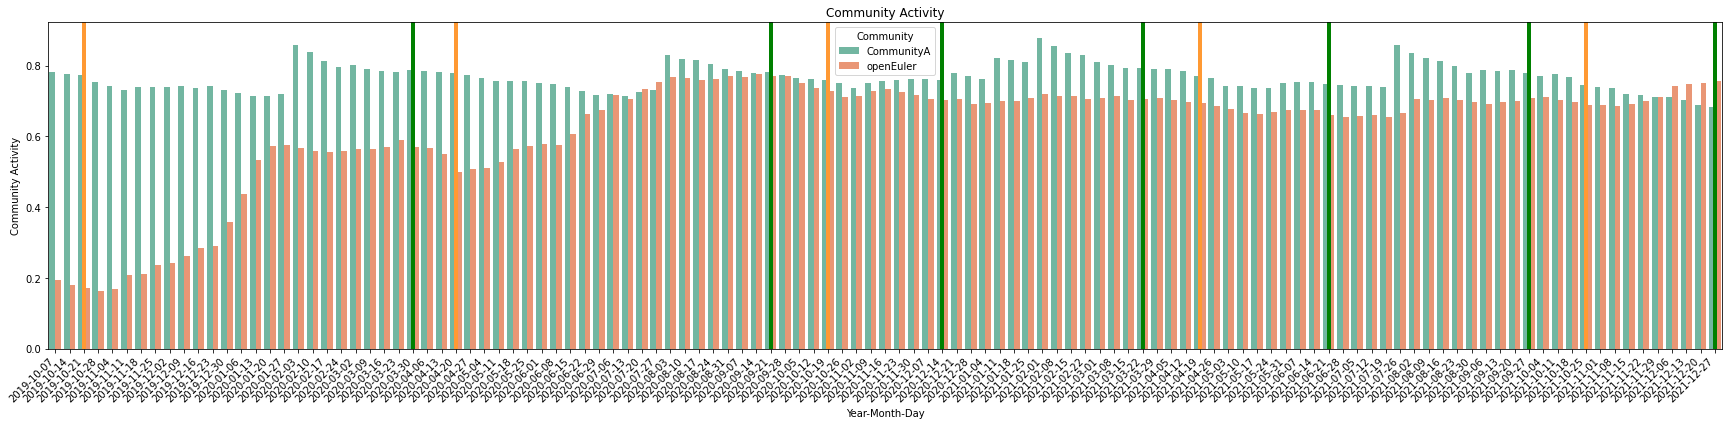

In [2]:
import sys
sys.path.append("..")
from algorithm.activity_algorithm import community_activity_score

# We will calculate community_activity_score every week. 
# THe detail of the algorithm is in community_activity_score.py file.
for i in all_metricmodel_data:
    i["community_activity_score"] = community_activity_score(i)

# draw a figure    
df=pd.DataFrame(all_metricmodel_data)  
draw_bar(df, y="community_activity_score", ylabel="Community Activity",title="Community Activity")
community_A_version_message(df);
openEuler_version_message(df);

We could see that Community A ‘s score is very stable, with an obvious pattern together with version release date.  openEuler as a young community, its value grows fast at the beginning, even exceeds Community A at some points, but there is no obvious pattern. 

Metric Model above has shown the comparation of two communities. It can also show the detail of any single Community. 

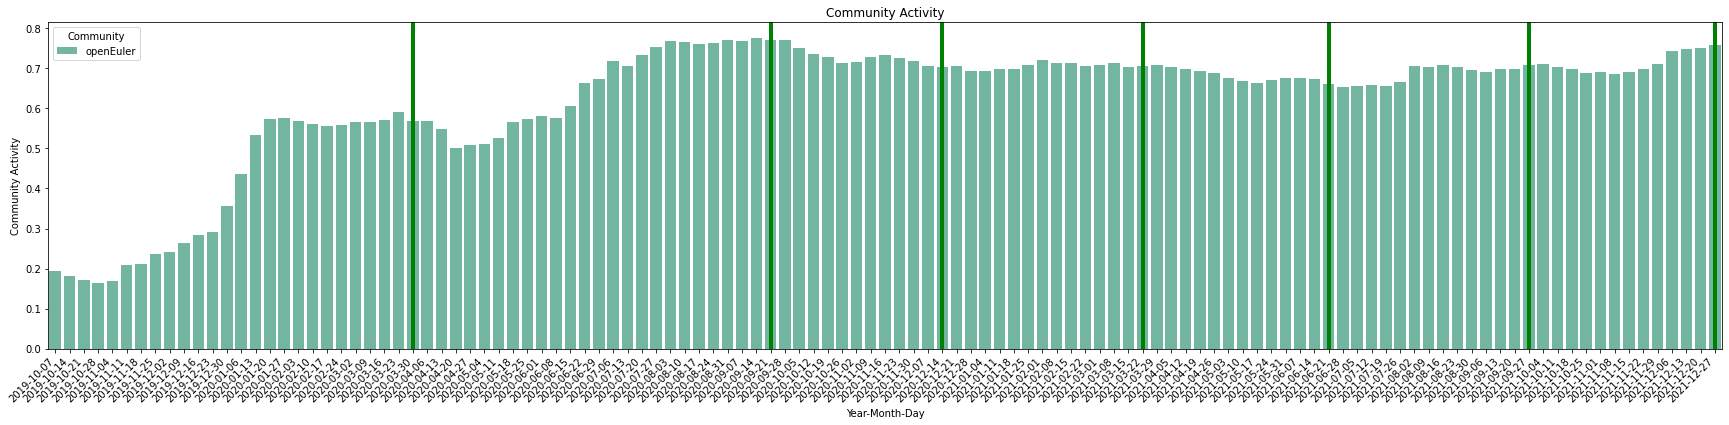

In [3]:
df_openEuler=pd.DataFrame(openEuler_r) 
draw_bar(df_openEuler, y="community_activity_score", ylabel="Community Activity",title="Community Activity")
openEuler_version_message(df_openEuler)

## Metrics Insight   
   
In order to get deep insights , we need to check the result of each metric. 
    
### 1. Contributor Count

Definition: How many active Commit authors, Review participants, Issue authors, Issue comments participants in the past 90 days. 

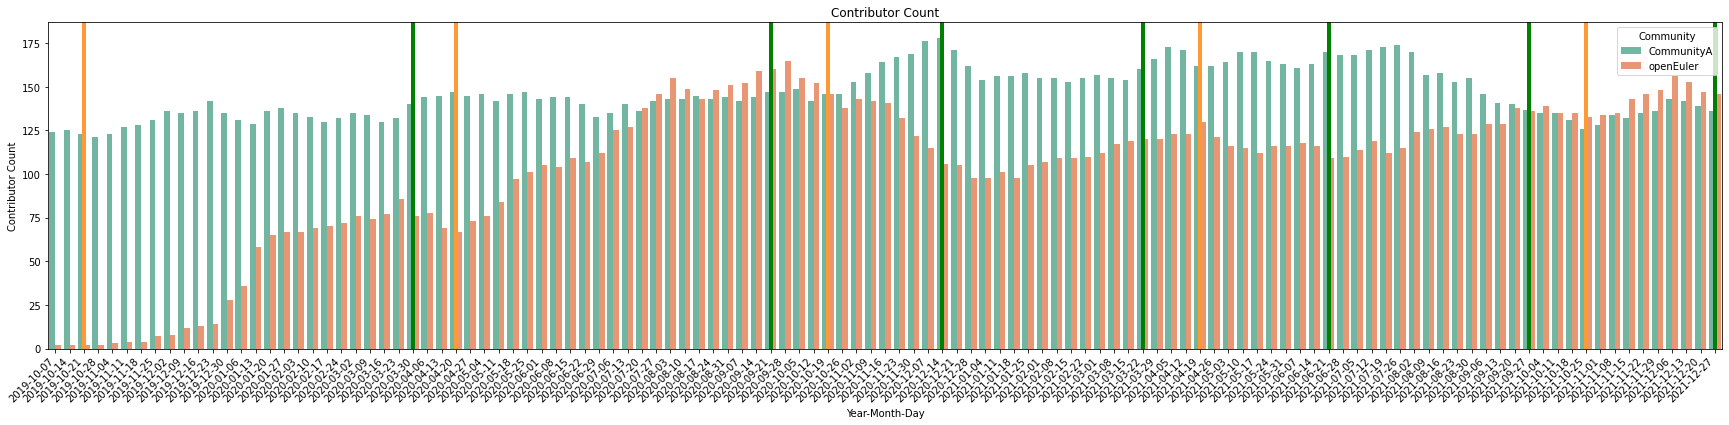

In [4]:
draw_bar(df, y="contributor_count", ylabel="Contributor Count",title="Contributor Count")
community_A_version_message(df);
openEuler_version_message(df);

Insight: The number of contributors (engaged these 200 repos contributions) in Community A is very stable,  openEuler shows a surge, which means it successfully attracts lots of new contributors.

Suggestion: ...

### 2. commit_frequency Result Analysis
    
Definition: Average number of commits per week in the past 90 days.

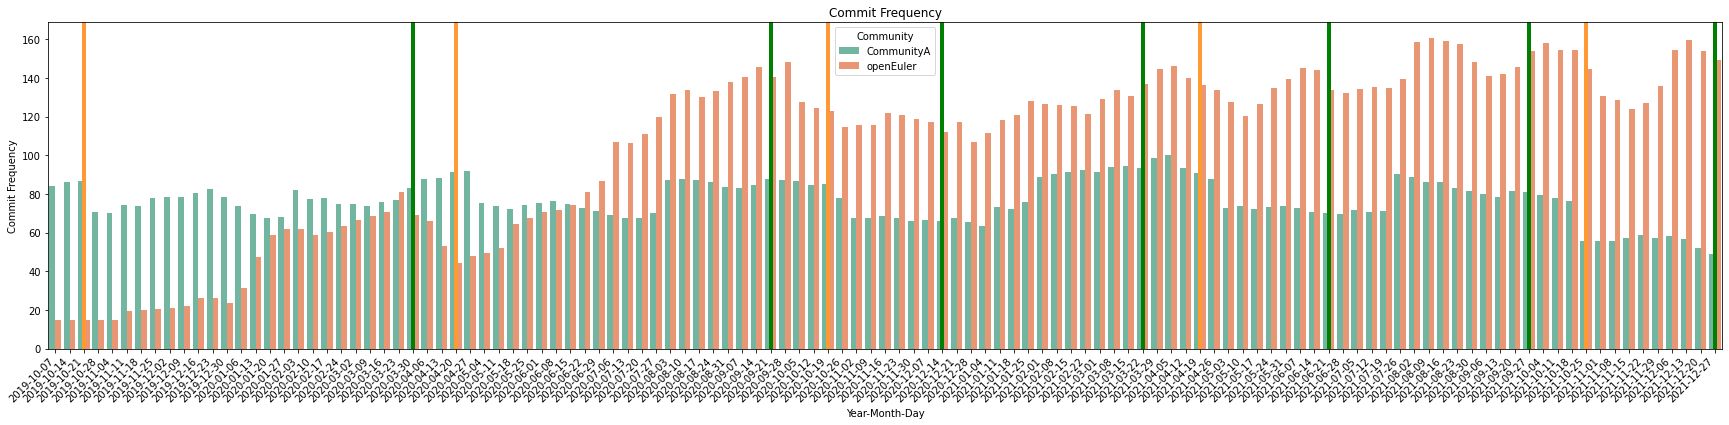

In [5]:
draw_bar(df, y="commit_frequency", ylabel="Commit Frequency",title="Commit Frequency")
community_A_version_message(df);
openEuler_version_message(df);

Insight: The result of Commit Frequency shows high relevance with contributor count. Also if you look closely with last figure , you would find that value waves of Community A have the same frequency with overall score. 

Suggestion: ...

## 3. Update_since
    
Definition: Average time per repo since the repos were last updated (in months)

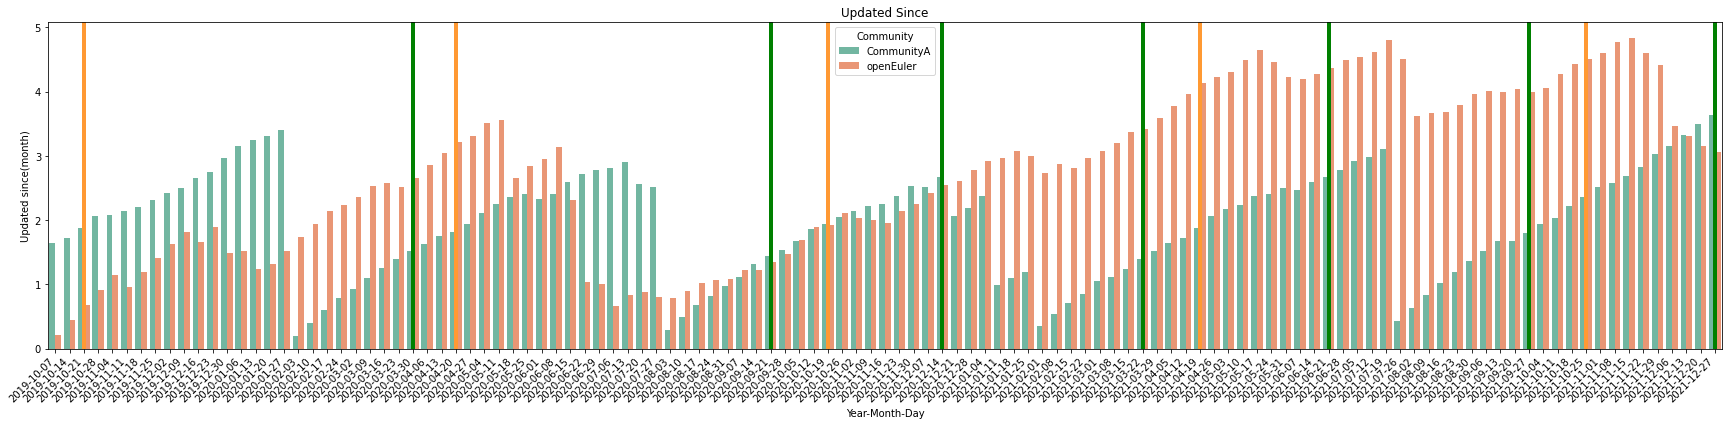

In [6]:
draw_bar(df, y="updated_since", ylabel="Updated since(month)",title="Updated Since")
community_A_version_message(df);
openEuler_version_message(df);

Insight: This figure shows update_since metric, community A shows an obvious triangular wave pattern, combined with Figure Community Activity, you would find that almost all the repos(200) have been maintained before each version was released. But openEuler doesn’t show such capability. 

Suggestion: ...

### 4. Comment Frequency
Definition: Average number of comments per issue in the last 90 days.

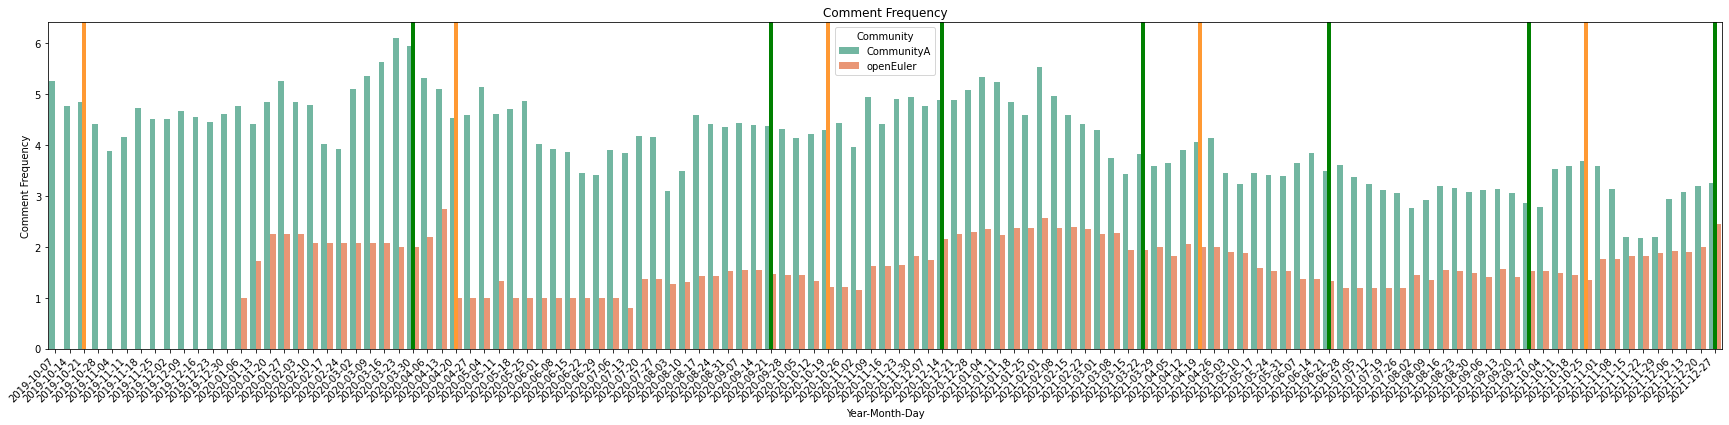

In [7]:
draw_bar(df, y="comment_frequency", ylabel="Comment Frequency",title="Comment Frequency")
community_A_version_message(df);
openEuler_version_message(df);

Insight: For each single issue, openEuler has ~2 comments, the number is very stable. After investigation, we find that each repo in openEuler has a stable group of contributors, they could always provide support, discuss around a topic.

Suggestion: ...

### 5. Closed_issues_count
Definition: Number of issues closed in the last 90 days

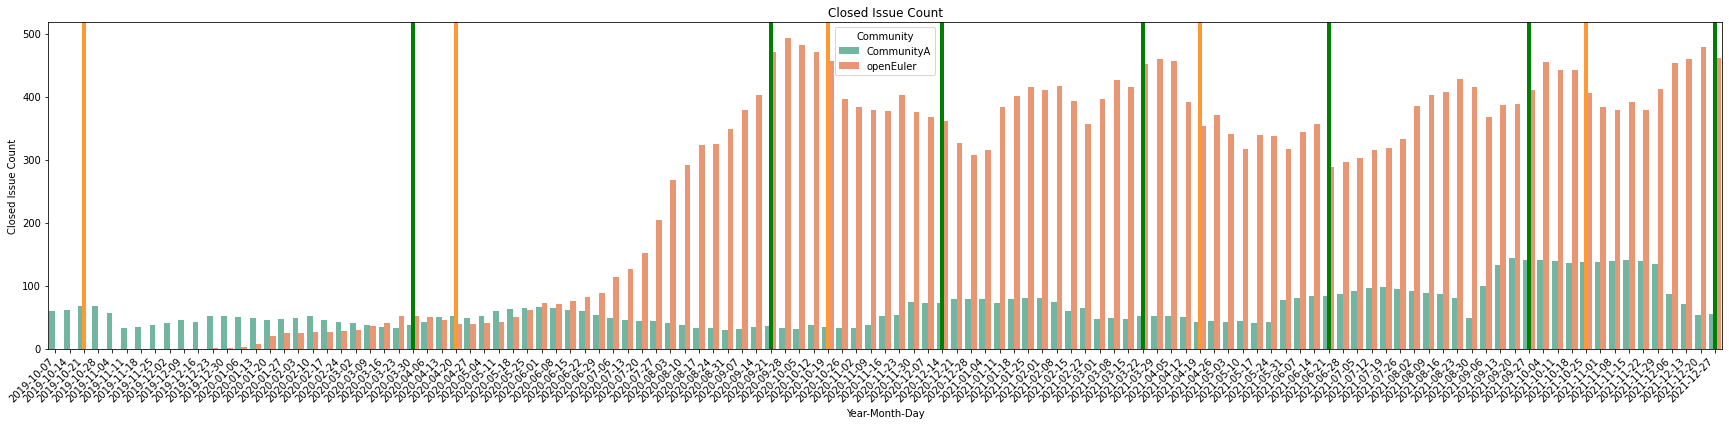

In [23]:
draw_bar(df, y="closed_issue_count", ylabel="Closed Issue Count",title="Closed Issue Count")
community_A_version_message(df);
openEuler_version_message(df);

### 6. Updated_issues_count
Definition: Number of issues updated in the last 90 days

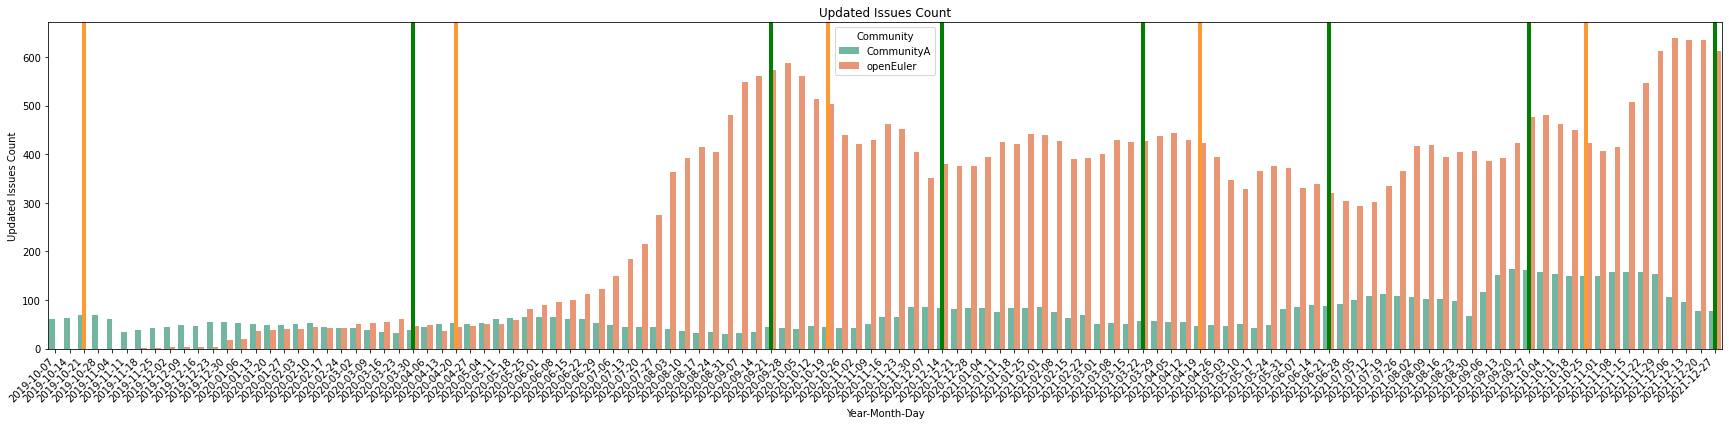

In [24]:
draw_bar(df, y="updated_issues_count", ylabel="Updated Issues Count",title="Updated Issues Count")
community_A_version_message(df);
openEuler_version_message(df);

Insight: We analyze close_issue_count and update_issue_count together, because they have a strong correlation that is reflected by the graph directly. Higher count of issue handling indicates high contributor involvement.

Suggestion: ...